# Text Sentiment Anaysis
- Tell whether a given text is <font color=blue>positive</font> or <font color=red>negative</font> 
    - "The food was very tasty" : Positive
    - "Got more work tomorrow" : Negative

# In this project:
- Labelled corpus of 100k tweets
    - 140 characters max
- No neutral. Attempt to classify everything to either positive or negative
    - Also the corpus doesn't have neutral label

In [1]:

import re
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

# Set up data
- Load the file
- Extract 100K texts from the 1.6M texts
- Extract only the necessary columns
- Convert polarity label to 0 for negative, 1 for positive

In [2]:
import pandas as pd
import numpy as np

def getTrainingData():
    data = pd.read_csv("/Users/Yixiu Liu/Desktop/data/training.csv", encoding='latin1')
    data.columns = ['polarity', 'id','date','query','user','text']
    return data

def extract_data(df, total):
    total //= 2
    df = (df[df['polarity'] == 0][:total]).append(df[df['polarity'] == 4][:total])[['text','polarity']]
    df['polarity'] = df['polarity'].apply(lambda x : 0 if x is 0 else 1)
    df.reset_index(inplace=True, drop=True)
    return df

data = getTrainingData()
data = extract_data(data, 100000)
data

text  polarity
0      is upset that he can't update his Facebook by ...         0
1      @Kenichan I dived many times for the ball. Man...         0
2        my whole body feels itchy and like its on fire          0
3      @nationwideclass no, it's not behaving at all....         0
4                          @Kwesidei not the whole crew          0
5                                            Need a hug          0
6      @LOLTrish hey  long time no see! Yes.. Rains a...         0
7                   @Tatiana_K nope they didn't have it          0
8                              @twittera que me muera ?          0
9            spring break in plain city... it's snowing          0
10                            I just re-pierced my ears          0
11     @caregiving I couldn't bear to watch it.  And ...         0
12     @octolinz16 It it counts, idk why I did either...         0
13     @smarrison i would've been the first, but i di...         0
14     @iamjazzyfizzle I wish I got to watch it with ...         0
15     Hollis' death scene will hurt me severely to w...         0
16                                  about to file taxes          0
17     @LettyA ahh ive always wanted to see rent  lov...         0
18     @FakerPattyPattz Oh dear. Were you drinking ou...         0
19     @alydesigns i was out most of the day so didn'...         0
20     one of my friend called me, and asked to meet ...         0
21      @angry_barista I baked you a cake but I ated it          0
22                this week is not going as i had hoped          0
23                            blagh class at 8 tomorrow          0
24        I hate when I have to call and wake people up          0
25     Just going to cry myself to sleep after watchi...         0
26                                im sad now  Miss.Lilly         0
27     ooooh.... LOL  that leslie.... and ok I won't ...         0
28     Meh... Almost Lover is the exception... this t...         0
29     some1 hacked my account on aim  now i have to ...         0
...                                                  ...       ...
99970               @loriboucher tell that to the Po Po          1
99971  @Lieneuh I m in Rotterdam every Tuesday  http:...         1
99972                      @SUNSHiNE_D Good Morning  lol         1
99973  @kristalm I have been smiling all morning, I t...         1
99974  @polokenny -- shit, everywhere! I don't discri...         1
99975  @chimpchrip - Yes! Hubs brought some home on h...         1
99976  Work laptop completely dead for 2nd time in 2 ...         1
99977                                      Good Morning          1
99978  20mins on the Bowflex now bfast and tv then li...         1
99979  @netvalar @DarkPiano @silixell @jojova @Hypnot...         1
99980                        @alexson What did you buy?          1
99981        @WonderWomanXO  Please post Madonna vid..           1
99982  @andrewkjs sun just walked away with tripple t...         1
99983  @iamdiddy hope you had a good night with the b...         1
99984  heyy. i dont have many followers so plz follow...         1
99985  @adrienne_daniel haha awe thanks sweetie &lt;3...         1
99986  @pcornqueen *climbs on the roof with his wobbl...         1
99987  @NatalyaFGM I'm on the bus so I'll take one af...         1
99988  All the twitterers make me happy tonight! What...         1
99989  Good Morning Tweets! Look out for BYL at the M...         1
99990                                   waiting for you          1
99991  Hanging out in Paris. The sun is amazing  I fe...         1
99992  @KerstinU Hey what a good idea.  What do you s...         1
99993                       good morning! happy monday!          1
99994  @dailycurl @Jessicurl @curlyqpgh Happy Monday ...         1
99995  Now need 8 followers to compleate 1000  Follow...         1
99996  I knew I had to explain something to my friend...         1
99997                 done tweeting..... til tomorrow..          1
99998  @cmozilo Act II set is pr

### Check data is balanced

In [3]:
print('Negative Texts: %d' %len(data[data['polarity']==0]))
print('Positive Texts: %d' %len(data[data['polarity']==1]))

Negative Texts: 50000
Positive Texts: 50000


### Create training and testing sets

In [4]:
from sklearn.model_selection import train_test_split

def split(df):
    test_ratio = 0.2
    return  train_test_split(df['text'], df['polarity'], test_size=test_ratio, random_state=1)

train_data, test_data, train_result, test_result = split(data)
print("0.2 split \nTrain: %d Test: %d" %(len(train_data), len(test_data)))

0.2 split 
Train: 80000 Test: 20000


# Convert words into numerical representations

## Bag of Words (BoW) model:





## CountVectorizer
- <font color='brown'>Note:</font> The feature dimension is <font color=red>very large</font>, so it returns <font color='0080FE'>sparse matrix</font>

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vr1 = CountVectorizer()
vr1.fit(train_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [6]:
vr1.transform(["Knitting is my hobby and my passion"])

<1x76551 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [7]:
print("Number of features: %d" % len(vr1.get_feature_names()))

Number of features: 76551


## Visualize the distribution
- Since it returns sparse matrix, we use TruncatedSVD as suppose to PCA

In [8]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# transform the text into vectors
text_vectors = vr1.transform(train_data)

# fit analyzer and reduce dimensions into 2D
svd = TruncatedSVD(n_components = 2)
reduced_text_vectors = svd.fit_transform(text_vectors)

# graph component 1 and 2
x,y = np.transpose(reduced_text_vectors)
color_seq = ['blue' if x==1 else 'red' for x in train_result.values]   #positive = yellow
plt.figure(figsize=(8,7))
plt.scatter(x, y, color=color_seq, s=2)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

## Component Analysis

In [9]:
# fit SVD with 200 components
svd2 = TruncatedSVD(n_components=200)
svd2.fit(text_vectors)

# graph
plt.ylabel("Cumulative explained variance")
plt.xlabel("Number of Components")
plt.title("Explained variance of 200 components")
plt.plot(np.cumsum(svd2.explained_variance_ratio_))
plt.show()
print("Explained ratio sum of 200 components: %f" % svd2.explained_variance_ratio_.sum())

Explained ratio sum of 200 components: 0.564790


# Not good, but it serves as a reference point

## ~Improvements has to be made, but let's check the classification performance first~

# Prepare for classification
- <font color='brown'>Note:</font> We won't use SVD to reduce dimensionality
    - There is no telling what feature SVD will take out, text is very sensitive, we will use more controlled reductions later
    - With a corpus of 100K tweets, probably at least thousands range is needed to be accurate in determining polarity
    - My computer crashes when components go into the thousands range

In [10]:
import itertools
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVR
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import sklearn.metrics as sm
from sklearn.metrics import classification_report
from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix

import seaborn as sn

def show_stats(actual, pred, name=None, matrix=True, stat1=True, stat2=True, curve=True):
    if name is None:
        name = 'Confusion Matrix'
    
    # metrics lib: confusion matrix graph
    if matrix:
        cm_g = confusion_matrix(actual, pred)
        cm_df = pd.DataFrame(cm_g, columns=['neg', 'pos'], index=['neg','pos'])
        plt.figure(figsize=(9, 7))
        sn.heatmap(cm_df, annot=True, fmt='g')
        plt.title(name)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

    # pandas_ml lib: confusion matrix all measurements
    if stat1:
        cm = ConfusionMatrix(actual.values, pred).stats()
        print('Accuracy: %f' % cm['ACC'])
        #print('F1_score: %f' % cm['F1_score'])
        print('FDR: %f' % cm['FDR'])
    
    # quick precision, recall, f1, support values
    if stat2:
        report = classification_report(actual, pred)
        print (report)
    
    # ROC Curve
    if curve:
        fp, tp, _ = sm.roc_curve(actual, pred)
        area = sm.auc(fp, tp)
        plt.plot(fp, tp, lw=2, label=("Area under curve: %f" % area))
        plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
        plt.legend(loc='lower right')
        plt.title('ROC Curve')
        plt.ylabel('True positive rate')
        plt.xlabel('False positive rate')
        plt.show()
    
    #return (cm_g, cm, report)
    
def failed_text(test_data, test_result, pre):
    failed_list = []
    for i in range(len(test_data.values)):
        if test_result.values[i] != pre[i]:
            failed_list.append( [test_data.values[i], test_result.values[i], pre[i] ] )
    return failed_list

def vec_score(vectorizer, text_arr):
    vec = vectorizer.transform(text_arr)
    features = vectorizer.get_feature_names()
    _, y = vec.nonzero()
    names = []
    for i in y:
        names.append(features[i])
    print(names)
    print(vec)

## Test MultinomialNB, SGD, LogisticRegression Classification

Accuracy: 0.763600
FDR: 0.209418
             precision    recall  f1-score   support

          0       0.74      0.82      0.78     10113
          1       0.79      0.71      0.75      9887

avg / total       0.77      0.76      0.76     20000



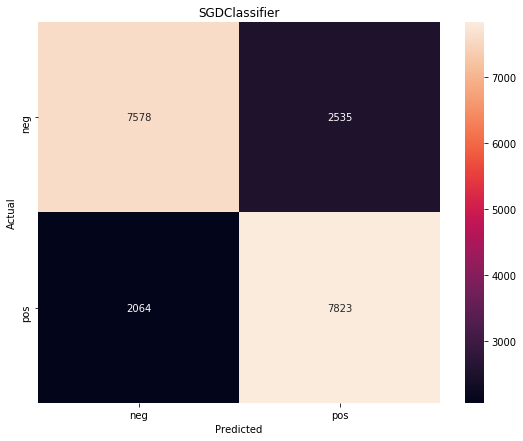

Accuracy: 0.770050
FDR: 0.244738
             precision    recall  f1-score   support

          0       0.79      0.75      0.77     10113
          1       0.76      0.79      0.77      9887

avg / total       0.77      0.77      0.77     20000



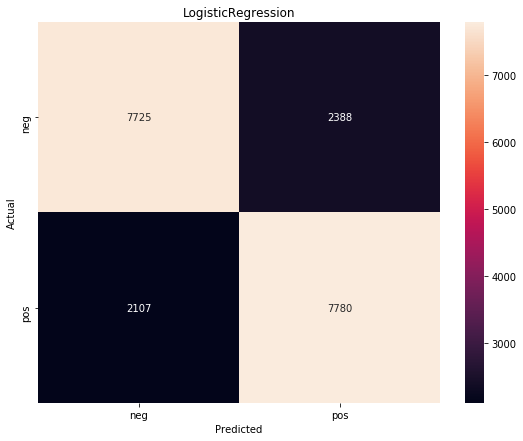

Accuracy: 0.775250
FDR: 0.234854
             precision    recall  f1-score   support

          0       0.79      0.76      0.77     10113
          1       0.77      0.79      0.78      9887

avg / total       0.78      0.78      0.78     20000



In [11]:
model_plaincount1 = Pipeline([
    ('vectorizer', vr1),
    ('classifier', MultinomialNB())
])
model_plaincount2 = Pipeline([
    ('vectorizer', vr1),
    ('classifier', SGDClassifier(max_iter=5, tol=None, random_state=0))
])
model_plaincount3 = Pipeline([
    ('vectorizer', vr1),
    ('classifier', LogisticRegression(random_state=0))
])
model_plaincount1.fit(train_data, train_result)
model_plaincount2.fit(train_data, train_result)
model_plaincount3.fit(train_data, train_result)
model_plaincount_pred1 = model_plaincount1.predict(test_data)
model_plaincount_pred2 = model_plaincount2.predict(test_data)
model_plaincount_pred3 = model_plaincount3.predict(test_data)
show_stats(test_result, model_plaincount_pred1, name='MultinomialNB', curve=False)
show_stats(test_result, model_plaincount_pred2, name='SGDClassifier',curve=False)
show_stats(test_result, model_plaincount_pred3, name='LogisticRegression',curve=False)

### Cross validate

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_plaincount1, data['text'], data['polarity'], cv=10)                  
print("MultinomialNB Accuracy: %0.2f ( %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(model_plaincount2, data['text'], data['polarity'], cv=10)                  
print("SGDClassifier Accuracy: %0.2f ( %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(model_plaincount3, data['text'], data['polarity'], cv=10)                  
print("LogisticRegression Accuracy: %0.2f ( %0.2f)" % (scores.mean(), scores.std() * 2))

MultinomialNB Accuracy: 0.75 ( 0.01)
SGDClassifier Accuracy: 0.77 ( 0.01)
LogisticRegression Accuracy: 0.77 ( 0.01)


### Multinomial has tendency to predict negative
- Low precision, high recall (put too much on negative that is often incorrect, the frequency of negative classification forcefully raised the amount of landing on the actual negative

### GSD performed about the same as LogisticRegression, but a bit worse
- It may be worth to come back later

### LogisticRegression chosen as the primary classifier for testing

# Pre-training improvements

# Improvement on the CountVectorizer: TF-IDF
- Takes into account of frequent word usage
- Constricts the weight of overused words and raise the weight of infrequent words
    - Overused words are likely to exist in both labels, making them less useful as features. eg. Good, no, yes
    




In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vr1 = TfidfVectorizer()

### Visualize Tfidf distribution

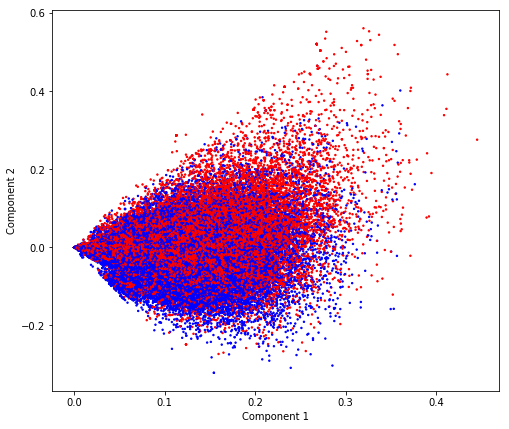

In [13]:
text_vectors = tfidf_vr1.fit_transform(train_data)

# fit analyzer and reduce dimensions into 2D
svd = TruncatedSVD(n_components = 2)
reduced_text_vectors = svd.fit_transform(text_vectors)

# graph component 1 and 2
x,y = np.transpose(reduced_text_vectors)
color_seq = ['blue' if x==1 else 'red' for x in train_result.values]   #positive = yellow
plt.figure(figsize=(8,7))
plt.scatter(x, y, color=color_seq, s=2)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

- More clear split in the data compared to CountVectorizer

### TfidfVectorizer for classification

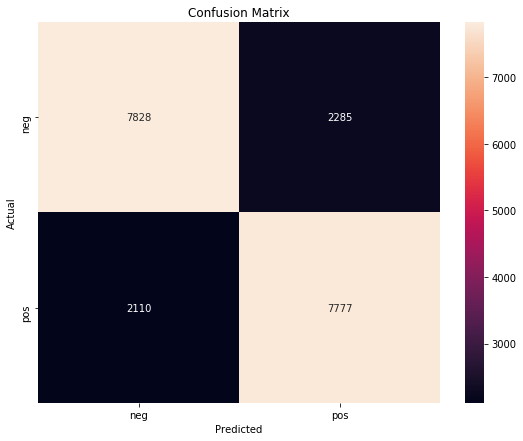

Accuracy: 0.780250
FDR: 0.227092
             precision    recall  f1-score   support

          0       0.79      0.77      0.78     10113
          1       0.77      0.79      0.78      9887

avg / total       0.78      0.78      0.78     20000



In [14]:
model_plaintfidf = Pipeline([
    ('vectorizer', tfidf_vr1),
    ('classifier', LogisticRegression(random_state=0))
])
model_plaintfidf.fit(train_data, train_result)
model_plaintfidf_pred = model_plaintfidf.predict(test_data)
show_stats(test_result, model_plaintfidf_pred, curve=False)

- Slight improvements on the scoring, accuracy is now 78%

# Improvements on text cleaning
- Currently, there is too many garbage in the features:

In [15]:
tfidf_vr1.get_feature_names()

['00',
 '000',
 '0000',
 '0007',
 '000kg',
 '001',
 '002',
 '003',
 '004',
 '00__00',
 '00am',
 '00h',
 '00hrs',
 '00pm',
 '01',
 '01000101',
 '0132',
 '01614948343',
 '018',
 '019',
 '02',
 '026',
 '026ers',
 '03',
 '031',
 '04',
 '0400',
 '0400429d9dec3dd1',
 '040407',
 '05',
 '0515',
 '05am',
 '05iphone',
 '05pm',
 '06',
 '0640',
 '06am',
 '06bjn',
 '06cxz',
 '06dog',
 '06dyl',
 '06e76',
 '06fd3',
 '06fnh',
 '06foa',
 '06fse',
 '06fuj',
 '06gzn',
 '06h1g',
 '06h8t',
 '06pm',
 '07',
 '0700',
 '0730',
 '073to',
 '074',
 '076',
 '076306',
 '07am',
 '08',
 '0800',
 '08am',
 '09',
 '090406',
 '095',
 '09pm',
 '0_',
 '0_0',
 '0__0',
 '0amityville0',
 '0boy',
 '0chris',
 '0cxz',
 '0e4ad48a87bd4c0593931f6a4f652aef',
 '0e7bethany',
 '0evxee',
 '0g',
 '0h',
 '0ht',
 '0l4ygj',
 '0lli',
 '0mgiitzree',
 '0mie',
 '0n',
 '0nkprb9xxls',
 '0otlo0',
 '0p5',
 '0p8',
 '0ppm',
 '0r',
 '0x',
 '0xdeadbeef',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '1000000',
 '1000cigarettes',
 '1000d',
 '1000he',
 '

### Lemmatization
- Reduce words to base form, so the weight of words won't be distributed across all of its variants

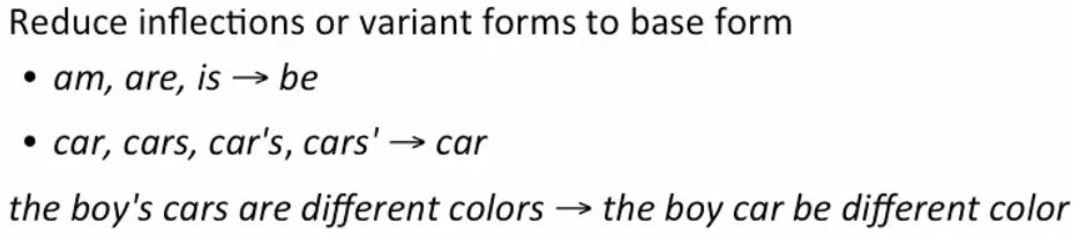

### Lowercase and apostrophe expansion
- Make the words even more uniform

In [16]:
from textblob import Word
from bs4 import BeautifulSoup
import re

def text_clean(text):
    return [Word(word).lemmatize('v') if word != 'n\'t' else 'not' for word in TextBlob(text.lower()).words]

In [17]:
sentence = '@hello person is ate chips while watching tv https://asdasd'
cleaned = text_clean(sentence)
print('Original: '+ sentence)
print('Cleaned: ' + ' '.join(cleaned))

Original: @hello person is ate chips while watching tv https://asdasd
Cleaned: hello person be eat chip while watch tv https asdasd


### Test the classification

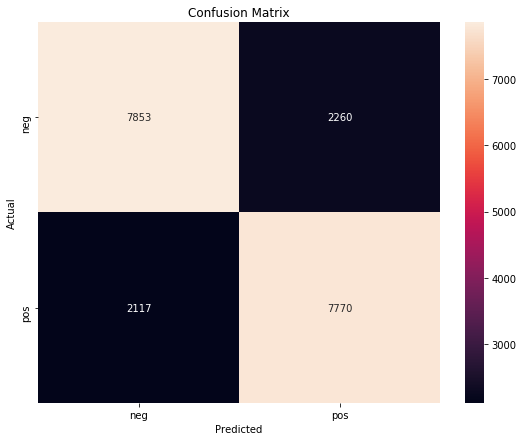

Accuracy: 0.781150
FDR: 0.225324
             precision    recall  f1-score   support

          0       0.79      0.78      0.78     10113
          1       0.77      0.79      0.78      9887

avg / total       0.78      0.78      0.78     20000



In [18]:
tfidf_vr2 = TfidfVectorizer(tokenizer=text_clean)

model_tfidfClean = Pipeline([
    ('vectorizer', tfidf_vr2),
    ('classifier', LogisticRegression(random_state=0))
])
model_tfidfClean.fit(train_data, train_result)
model_tfidfClean_pred = model_tfidfClean.predict(test_data)
show_stats(test_result, model_tfidfClean_pred, curve=False)

- Marginal increase again, but it raised the recall of negative classification without trading off other scorings

# Improvements on vectorizer parameter 
- The previous text cleaning step made way for more accurate vectorizer parameter tuning

## Document frequency lower bound: min_df
- Since we already lemmatized, words that occur in very few tweets are likely to be not useful
- I found the best min_df bound to be 6
- <font color='brown'>Note:</font> At this point, after the lowercase, expansion, lemmatization, and min_df, the dimension of features has been heavily reduced

In [19]:
test_vec = TfidfVectorizer(tokenizer=text_clean, min_df=6, lowercase=True)
test_vec.fit(train_data)
print("Features: %d" % len(test_vec.get_feature_names()))

Features: 7150


## Term frequency calculation: binary_tf
- Tfidf gives too much weight to infrequent words that they gained too much influence over the polarity
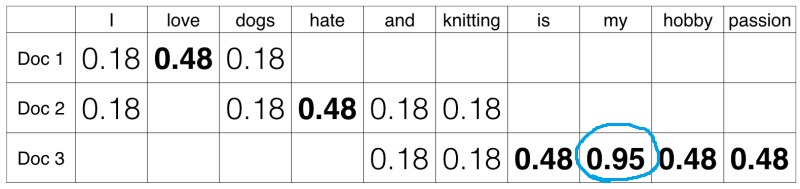

- Use binarty for the term frequency to constrict the multiplier given to the infrequent words

## NGram: ngram_range
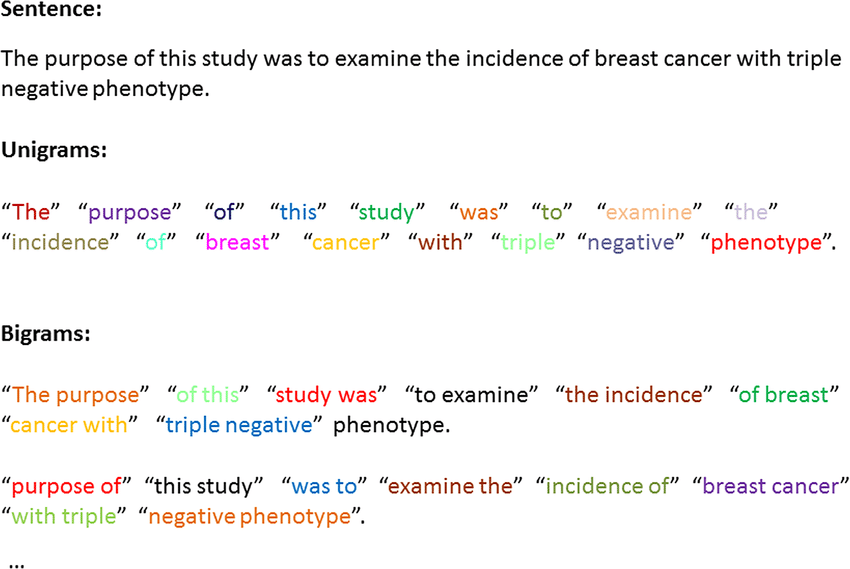
- Bag of words ignores word orders, so the context is not preserved
- To accomodate, simulate a little bit of context by grouping several words together as one word in the word bag
- Words such as 'not', 'never', 'crazy' that require context to finalize its polarity will have more meaning


# Putting everything together

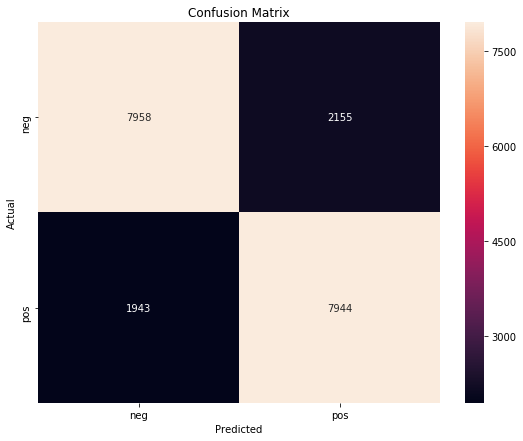

Accuracy: 0.795100
FDR: 0.213387
             precision    recall  f1-score   support

          0       0.80      0.79      0.80     10113
          1       0.79      0.80      0.79      9887

avg / total       0.80      0.80      0.80     20000



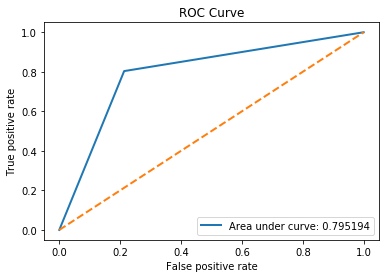

In [91]:
tfidf_vr3 = TfidfVectorizer(tokenizer=text_clean, lowercase = True, binary=True, min_df = 6, ngram_range=(1,2))
logreg = LogisticRegression(random_state=0)

model_tfidfAll = Pipeline([
    ('vectorizer', tfidf_vr3),
    ('classifier', logreg)
])
model_tfidfAll.fit(train_data, train_result)
model_tfidfAll_pred = model_tfidfAll.predict(test_data)
show_stats(test_result, model_tfidfAll_pred)

- About 80% with evenly distributed scores

### Cross validate

In [25]:
scores = cross_val_score(model_tfidfAll, data['text'], data['polarity'], cv=10)                  
print("Accuracy: %0.2f ( %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 ( 0.01)


### Parameter tuning

In [22]:
from sklearn.model_selection import GridSearchCV

tfidf_tune = TfidfVectorizer(tokenizer=text_clean, lowercase = True, binary=True, min_df = 6)

model_tune = Pipeline([
    ('vectorizer', tfidf_tune),
    ('classifier', LogisticRegression(random_state=0))
])

parameters = {
    'vectorizer__ngram_range': [(1, 2), (1, 3)],
    'classifier__C': [0.001, 0.01, 0.1, 10, 100, 1000]
}

gs = GridSearchCV(model_tune, parameters, verbose=3)
gs.fit(train_data, train_result)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] classifier__C=0.001, vectorizer__ngram_range=(1, 2) .............
[CV]  classifier__C=0.001, vectorizer__ngram_range=(1, 2), score=0.7159035512056099, total=  43.5s
[CV] classifier__C=0.001, vectorizer__ngram_range=(1, 2) .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV]  classifier__C=0.001, vectorizer__ngram_range=(1, 2), score=0.7183410207372408, total=  43.5s
[CV] classifier__C=0.001, vectorizer__ngram_range=(1, 2) .............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.4min remaining:    0.0s


[CV]  classifier__C=0.001, vectorizer__ngram_range=(1, 2), score=0.725643141078527, total=  42.9s
[CV] classifier__C=0.001, vectorizer__ngram_range=(1, 3) .............
[CV]  classifier__C=0.001, vectorizer__ngram_range=(1, 3), score=0.7179285258934264, total=  46.6s
[CV] classifier__C=0.001, vectorizer__ngram_range=(1, 3) .............
[CV]  classifier__C=0.001, vectorizer__ngram_range=(1, 3), score=0.7232534593317583, total=  46.6s
[CV] classifier__C=0.001, vectorizer__ngram_range=(1, 3) .............
[CV]  classifier__C=0.001, vectorizer__ngram_range=(1, 3), score=0.7281182029550739, total=  46.6s
[CV] classifier__C=0.01, vectorizer__ngram_range=(1, 2) ..............
[CV]  classifier__C=0.01, vectorizer__ngram_range=(1, 2), score=0.7328158398020025, total=  42.4s
[CV] classifier__C=0.01, vectorizer__ngram_range=(1, 2) ..............
[CV]  classifier__C=0.01, vectorizer__ngram_range=(1, 2), score=0.7357783027712154, total=  42.4s
[CV] classifier__C=0.01, vectorizer__ngram_range=(1, 2

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 45.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=6,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tru...nalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'vectorizer__ngram_range': [(1, 2), (1, 3)], 'classifier__C': [0.001, 0.01, 0.1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

- Original alpha=1 is still the best

# Another approach: attempt at building classifier

## Ratio classifier
- Ratio of participation of each word in negative and positive labels
- Sentiment is decided by the summed positivity and negativity ratio of each word in the sentence

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction import text

class RatioClassifier(BaseEstimator, TransformerMixin):
    def __init__(self, tokenizer=None):
        self.data = {}
        self.all_info = pd.DataFrame(columns=['Neg','Pos','Total','Badness','Goodness'])
        self.features = pd.DataFrame(columns=['Badness','Goodness'])
        self.word_count = 0
        self.processed_line_count = 0
        self.stop = text.ENGLISH_STOP_WORDS
        if tokenizer is not None:
            self.tokenize = tokenizer
            
    def fit(self, x, y):
        self.clear()
        for line, out in zip(x.values, y.values):
            self.process_line(line, out)
            
        trainedset = pd.DataFrame.from_dict(self.data, orient='index')
        trainedset.columns = ['Neg','Pos','Total']
        trainedset['Badness'] = trainedset['Neg']/trainedset['Total']
        trainedset['Goodness'] = trainedset['Pos']/trainedset['Total']
        
        self.all_info  = trainedset
        self.features = trainedset.drop(['Neg','Pos','Total'], axis=1)
        return self
    
    def transform(self, x):
        result_list = []
        for line in x:
            word_list = self.tokenize(line)
            features = self.features
            rows = features.loc[features.index.intersection(word_list)]
            pos = rows['Goodness'].sum()
            neg = rows['Badness'].sum()
            pred = 0 if neg>pos else 1
            if pred==1:
                if neg == 0.0:
                    ratio = 100
                else:
                    ratio = pos/neg
            else:
                if pos == 0.0:
                    ratio = 100
                else:
                    ratio = neg/pos
            #ratio = pos/neg if pred else neg/pos
            result_list.append([neg, pos, ratio, pred])
        return result_list
    
    def fit_transform(self, x, y):
        self.fit(x, y)
        return self.transform(x)
    
    def predict(self, x):
        return self.transform(x)
    
    def __toIndex(self, output):
        if output == 0:
            return 0
        else:
            return 1
    
    def process_word(self, word, output):
        if word in self.stop:
            return
        if word not in self.data:
            self.data[word] = [0,0,0]
        self.data[word][self.__toIndex(output)] += 1 # pos/neg count++
        self.data[word][2] += 1 # this word count++
        self.word_count += 1 # all word count++
    
    def process_line(self, line, output):
        self.processed_line_count += 1
        for word in self.tokenize(line):
            self.process_word(word, output)
    
    def __filtered(self, word):
        return word != '' and not word.startswith('@') and word not in self.stop
    
    def tokenize(self, line):
        words = re.split('(?!\')(?!@)[^\w+]', line.lower())
        return [x for x in words if self.__filtered(x)]
    
    def clear(self):
        self.all_info = pd.DataFrame(columns=['Neg','Pos','Total','Badness','Goodness'])
        self.features = pd.DataFrame(columns=['Badness','Goodness'])
        self.data.clear()
        

## Test the classifier

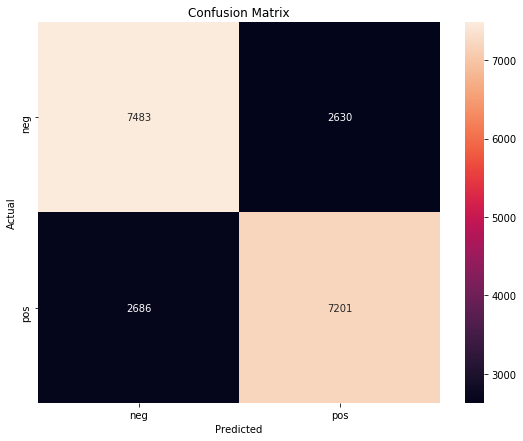

Accuracy: 0.734200
FDR: 0.267521
             precision    recall  f1-score   support

          0       0.74      0.74      0.74     10113
          1       0.73      0.73      0.73      9887

avg / total       0.73      0.73      0.73     20000



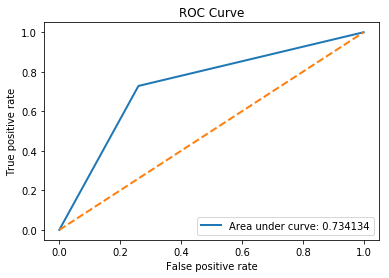

In [69]:
rv = RatioClassifier(tokenizer=text_clean)
rv.fit(train_data, train_result)

rv_pred = rv.predict(test_data)
show_stats(test_result, np.array(rv_pred)[:,3])

- Not very good

## But good at predicting short, blunt statements

### Ratio classifier:

In [74]:
np.array(rv.predict(['I will kill you', 'today is a happy day', 'more work', 'you are ugly']))[:,-1]

array([ 0.,  1.,  0.,  0.])

### Tfidf_LogisticRegression classifier:

In [73]:
model_tfidfAll.predict(['I will kill you', 'today is a happy day', 'more work', 'you are ugly'])

array([1, 1, 0, 1], dtype=int64)

## Combine classifier predictions: Polling classifier
- Take a vote between Tfidf_LogisticRegression and Ratio_Classifier
- If ratio is greater than 1.6, use Tfidf_LogisticRegression

Total results: 20000
Ratio classifier used: 6172


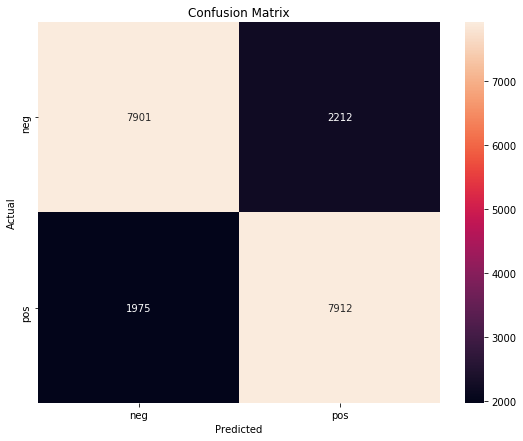

Accuracy: 0.790650
FDR: 0.218491
             precision    recall  f1-score   support

          0       0.80      0.78      0.79     10113
          1       0.78      0.80      0.79      9887

avg / total       0.79      0.79      0.79     20000



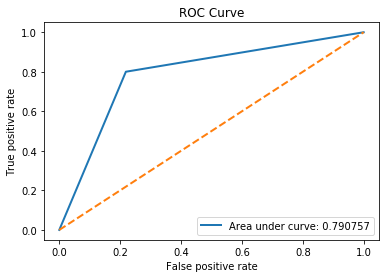

In [87]:
threshold = 1.6
final_pred = []
ratio_used = 0
for i in range(len(rv_pred)):
    if rv_pred[i][2]>=threshold:
        final_pred.append(rv_pred[i][3])
        ratio_used+=1
    else:
        final_pred.append(model_tfidfAll_pred[i])
print('Total results: %d' %len(rv_pred))
print('Ratio classifier used: %d' % ratio_used)
show_stats(test_result, final_pred)

- Worse performance
- May be that the Ratio classifier is good at short statement, but the tweets are of medium length

## FeatureUnion also performed about the same, but took too long to train and worse accuracy
- Predictor loses accuracy but adapts to short statements

# Conclusion:
## Best classifier:

> Text Cleaner: Lemmatization, lowercase, expand apostrophe

> TfidfVectorizer: tokenizer=text_clean, lowercase = True, binary=True, min_df = 6, ngram_range=(1,2)

> LogisticRegression: C=1